# Recap & Agenda

### Last Class

Last class, we learnt the basics of algorithms and scratch coded an algorithm ourselves. By this point you should generally know how algorithms work and how the process of creating one looks like. 
<br>
The process itself is super important, because making a Machine Learning model is usually a much shorter process than cleaning and wrangling the data. While creating our own algorithm from scratch last class, we covered the following steps:

1. Collect/Import data <br>
2. Clean & Wrangle data <br>
3. EDA <br>
4. Normalize data (feature scaling) <br>
5. Create algo & generate predictions <br>
6. Denormalize data <br>
7. Calculate error <br>
8. Manually consider ways to improve the model, implement changes, and repeat 1-7 <br>
    - if changes improve the model keep them <br>
    - if changes make the model worse, throw them out
    
What is different about Machine learning is that there are pre-made algorithms in Python libraries that we can use, essentially OOB. So in essence, learning Machine Learning is not just about learning how to make algorithms, but also learning what every algorithm does, what its use cases and pros & cons.

Furthermore, from a beginner's perspective, it is less important to understand the mechanics and the Maths behind each algorithm and more useful to understand where and how they can be applied to derive insight. 


### Agenda
- Introduction to Machine Learning
- Introduction to regressions
- Linear Regressions
- Multivariate Regressions
- Logistic Regressions
- Mini-project

# 1.0 Introduction to Machine Learning

Machine Learning is a subset of Artificial Intelligence where it allows computers and computational systems to learn without being told exactly what to look for or being explicitly programmed. 

Think of Facebook's facial recognition systems, Amazon's or Netflix's recommendation systems; they're all practial applications of ML. It has exploded to the forefront of company's and people's minds because of the explosion in data creation and storage that the world is seeing for the past years. This will only increase, and ML algorithms are a way to extract actionable insight from this data without extensive human input. 

**How to think of ML algorithms**

Think of someone who uses ML algorithms as a car mechanic, who is trying to diagnose and consequently solve problems with customer's cars. He has a wide array of tools at his disposals. But every single tool is only good for very specific tasks. The mechanic needs to know what tool to apply where so he can easily and efficiently diagnose and solve issues (e.g. he would not be a very good mechanic if he tried painting the car with a hammer). 

A Machine Learning Engineer is very similar to a mechanic by that analogy. There are hundreds upon hundreds of algorithms and statistical techniques that exist, and it is very important to know which technique to use for what purpose. In this vein, as we introduce numerous Machine Learning algorithms, we will talk about
- What it does, some of it's basic mechanics  
- Most common use cases
- Pros and cons 
- How to implement it in Python & intepret results


### Supervised vs Unsupervised Learning

In general, Machine Learning algorithms can be classified into two categories: Supervised and Unsupervised. It's important to understand the differences between them to see how we can categorise these algorithms and see where they can be used. 

**Supervised Learning**

Supervised Learning is when an algorithm reqruies input variables (your Xs) and output variables (your Ys). Supervised algorithms in general try to use the Xs to make predictions on Y, and when you have newly gathered data, they can use the model to predict the Ys. All predictive algorithms by definition then fall into the supervised category. In actuality, this is the category in which most Machine Learning algorithms fall.

Examples of Supervised algorithms are regressions, decision trees, KNNs etc. 

**Unsupervised Learning**

This class of algorithms does not require any output variables (Ys), and is not geared for predictions. Rather you are trying to find the inherent patters and distributions in your dataset, which is often then used to inform more predictive ventures. 

Examples of unsupervised learning algorithms are k-means and hierarchical clustering, gaussian mixture models, some forms of Neural Networks etc.


# 2.0 Regression Analysis

### What are regressions anyways?

Regressions are techniques to find the significance of the relationship between a Y (dependent variable), and one (or numerous) X (independent variable). 

Regression are very popular and are very widely used in many many industries and sectors, because they are very simple ways to build predictive models. It's trivial to check how 'good' your model is, check your error, and tweak it to make it better.

For example, let's say we had a data set of houses with four characteristics: square footage, location, building age and price it last sold for. Let's say you're trying to predict price and are trying to find other variables that strogly affect price.

To do that, you can run linear regression on price as the dependent variable (your Y), and other variables one by one as X. You can also combine all your variables to run a multivariate regression.

To emphasize, the idea behind this is really simple. All you're doing is fitting a straight line to a set of observations. 

The method usually used is called OLS (Ordinary Least Squares), where it tries to minize the squared errors between the line and each point. That's it! Python does this all for you, and I won't go into the mechanics of this, but it is very useful as you will see!  

This is the regression equation:
    
Y = β0 + β1*X1 + β2*X2 + … + βn*Xn  (same as y = mx + c)
 
 X1, X2 ... Xn are called the 'predictor' variables, that we are using to predict the dependent variable. This is because you can use the equation of the line to predict unobserved values.

### 2.1 Linear Regressions

Linear Regressions are the simplest types of regressions where you have one X predicting a Y. Often used to see the impact an independent variable has on the dependent variable, these are more useful for EDA and less practical. 

**Use Cases & Data Types:** Linear regressins can basically be used anywhere you have continous data (any possible values between a range, range can be between infinities). Y is something you are trying to predict (housing price in the above example), and your X is one of your conitnuous, independent variables.

**Pros:** 
- Simple to understand and execute
- Computationally inexpensive
- Easy to spot relationships and interpret output

**Cons:**
- Only a linear fit can be discerned (bad at predicting non-linear datasets, i.e. most)
- Very sensitive to outliers
- Drawbacks in real life practicalities

In [1]:
import pandas as pd

house = pd.read_csv('housing_prices.csv')
house.head()  # Clearly, out Y here is price and X's are sq_feet and quality

,price,sq_feet,quality
0,30992.64,718,38
1,21187.60,601,30
2,47161.68,896,41
3,15338.82,421,19
4,29759.07,551,49


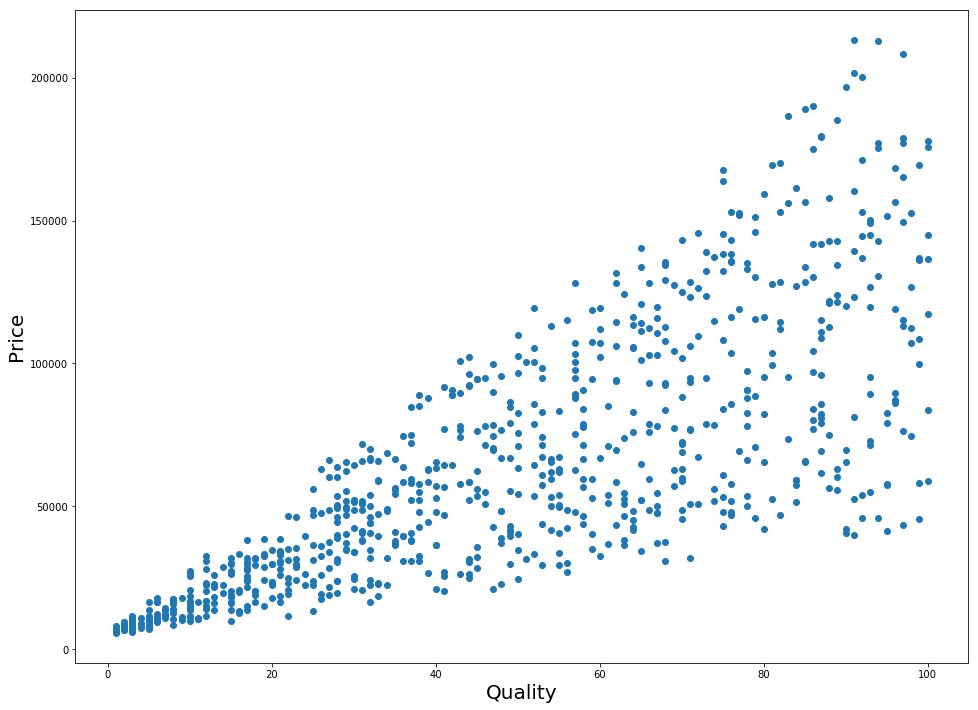

In [2]:
# Let's first see if we can spot a relationship again between quality and price

import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plt.scatter(house['quality'],house['price'])
plt.xlabel('Quality',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()


In [3]:
# Let's clean our data and remove Nulls
import numpy as np
house_q = house[['price','quality']]
house_q = house_q.dropna(how='any')

X = np.array(house_q['quality'])
Y = np.array(house_q['price'])

print(X)

X = np.array(house_q['quality']).reshape(799,1)
Y = np.array(house_q['price']).reshape(799,1)

#print(X)

[ 38  30  41  19  49  88  95  80  38  54  56  49  87  21  12  94  21  78
  93  48  15  14  32  40  93  51  32  89  58  32  91  80  94  15  50  99
  96  22  28  41  61  85  17  83  34  76  23   7  60  68  84  12  42  80
  48  72  63  93  30  50  46  99  87  10  87  33  62  88  52  87  14  22
   4  80  64  59  85   1   1  21  87   3  50  82  25  20  52  19  15   1
  10  79   2  54  96  40  32  76  37 100   3  68  97  37  49  18  19  29
  98  97  53  90  29  56  72  28   8  39  78  65  60  52  70  27  89  99
  31   8  87  67  10  37  79  15  95  58  15  44  20  58  13  86  77  76
  28  48   8   8  95  87  41  47  55  92  34   3 100  21  10  48  93  89
  29  12  44  59 100  37   2  36  97  28  60  30  55   1  64  38  97  65
  75  57  44  64  33  60  75  84  28  86  50  53  33  61  35  58  96  17
  30   5  29  79  75   6  16  49  57  66  97  21   5  32  30  36  25  46
  43  55  77  82   7  67  58  54  66  17  57   3  49  11  41  36  18  33
  69  57  59  86  54  50  32  26  34  27   2  32  7

In [4]:
#np.array(house_q['price']).reshape

In [5]:
import sklearn
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm = lm.fit(X,Y)

#lm.fit?

In [6]:
# Now we can make our equation!

print("Intercept ", lm.intercept_)
print("Coefficient ", lm.coef_)

Intercept  [ 5361.44901479]
Coefficient  [[ 1207.31991775]]


In [7]:
preds = lm.predict(X)
MSE  = np.mean((Y-preds)**2)
print('MSE: ', MSE)

MSE:  796036028.08


Remember our custom algorithm's MSE? It was over a billion. We're already doing better! 

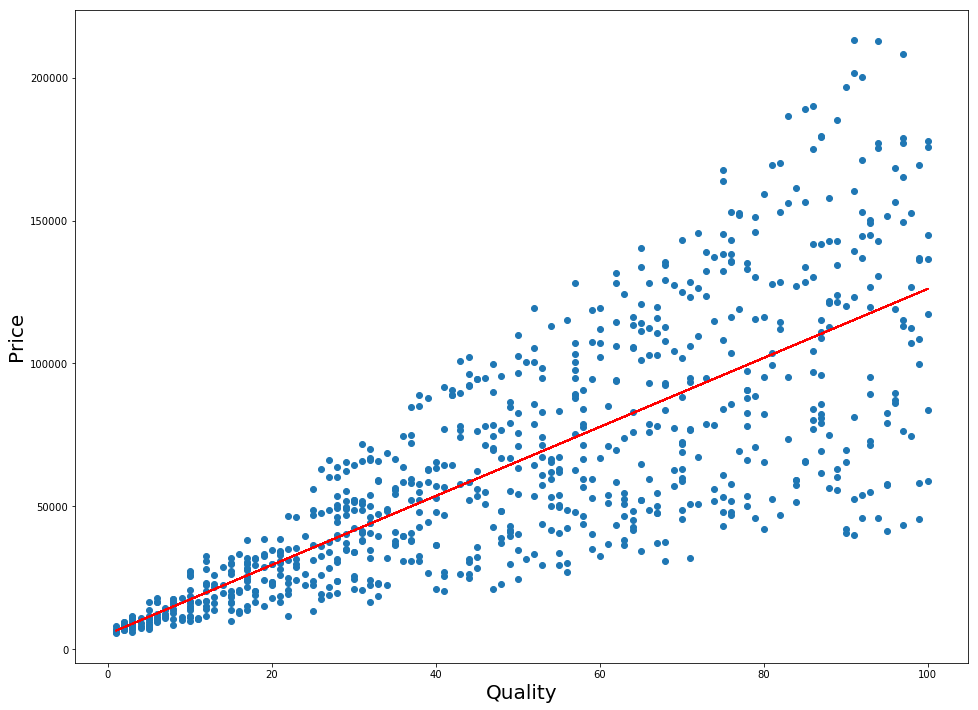

In [8]:
# Let's see what the plot shows

plt.figure(figsize=(16,12))
plt.scatter(X,Y)
plt.plot(X,preds,color='r')
plt.xlabel('Quality',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

Another good way to see how our regression is performing is to use a metric called R-squared. 

R-squared measures how much of the variance in your dependent variable (Y) is expalained by the variance in your independent variable (X). Essentially, it tells you 'how' good a predictor your X is. 

In [9]:
from sklearn.metrics import r2_score

print("R^2 Score: ", r2_score(Y, preds))

R^2 Score:  0.599512806993


This tells you that ~60% of the fluctuations and change in price is explained by quality. That's actually pretty good for a single variabe!

I'm pretty sure I know the answer to this, but for curiosity's sake, let's try see what sq_feet's MSE & R^2 is

In [10]:
X2 = np.array(house['sq_feet']).reshape(799,1)
lm.fit(X2,Y)
print("Intercept ", lm.intercept_)
print("coefficient ", lm.coef_)
print("MSE: ", np.mean((Y-lm.predict(X2))**2))
print("R^2: ", r2_score(Y, lm.predict(X2)))

Intercept  [ 3344.53934357]
coefficient  [[ 50.24004577]]
MSE:  1441121907.37
R^2:  0.274968912081


Much worse on all aspects.

# In-Class Activity 1:

Can you use dimensionality reduction (as last time or differently) and see what the MSE for that new variable is?
Which variable was the best predictor?


In [11]:
#Your code below:
X3 = np.array(house['sq_feet'] * house['quality']).reshape(799,1)
lm.fit(X3,Y)
preds3 = lm.predict(X3)
print("Intercept ", lm.intercept_)
print("coefficient ", lm.coef_)
print("MSE: ", np.mean((Y-lm.predict(X3))**2))
print("R^2: ", r2_score(Y, lm.predict(X3)))




Intercept  [ 5570.56348724]
coefficient  [[ 0.98729392]]
MSE:  83220290.7152
R^2:  0.958131718347


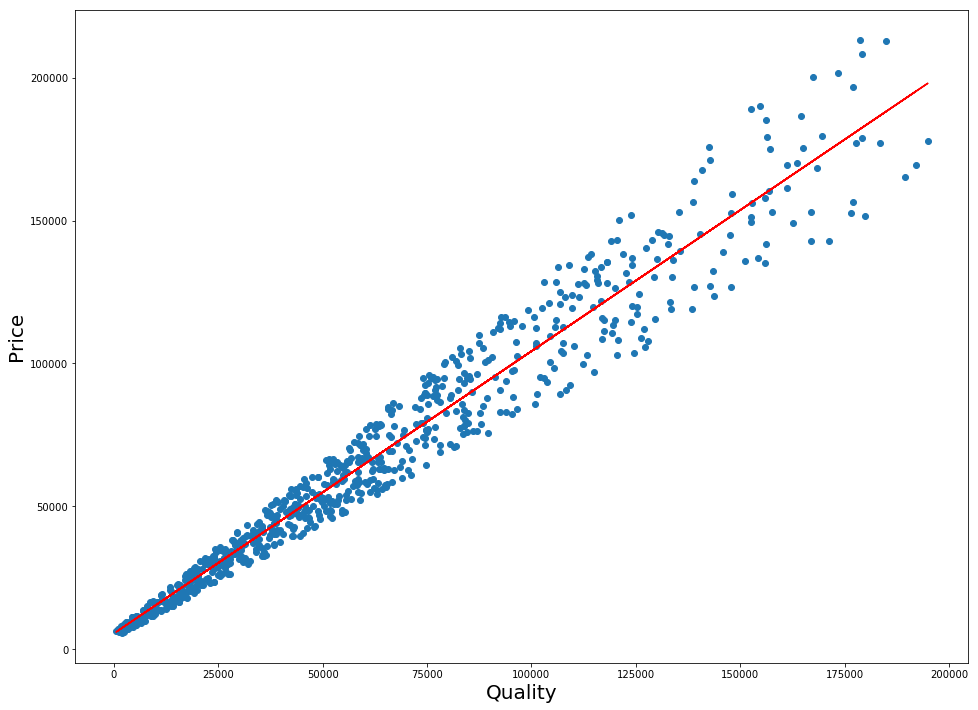

In [12]:
plt.figure(figsize=(16,12))
plt.scatter(X3,Y)
plt.plot(X3,preds3,color='r')
plt.xlabel('Quality',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### How can we improve this model?

So far we know that we have a certain level of error, but how can we go about improving our model? There is a chance that even if we minimise error, our model might not be actually suited for data that it hasn't seen. How do we avoid that?

Any ideas?


## 2.2 Train/Test Splits 

Train/Test splits are incredibly important because they allow you to train your model on part of the data, and test it on 'unseen' data that the model hasn't seen yet. This way, you can minimise error and see how good your model performs on unseen data. Remember, any model you build is by definition going to be used to predict unseen data, so it's crucial that Train/Test is done, and that it's done right.

The idea is simple: we take our dataset, and split it randomly in a ratio (normally 75:25). We then train a model on the bigger dataset and try minimise error, and then test how good it is at predicting on the test dataset. We get the best of both worlds in that way!

In [13]:
from sklearn import cross_validation

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y, test_size = 0.25,  random_state = 2)

   
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(599, 1)
(599, 1)
(200, 1)
(200, 1)


C:\devtool\app\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Now, let's build a linear regression model on our test data, and then compare errors

lm = LinearRegression()
lin = lm.fit(X_train,Y_train)
print("Intercept ", lin.intercept_)
print("Ccoefficient ", lin.coef_)
print("MSE on train data: ", np.mean((Y_train-lin.predict(X_train))**2))
print("R^2 on train data: ", r2_score(Y_train,lin.predict(X_train)))

Intercept  [ 6512.64246484]
Ccoefficient  [[ 1171.48849612]]
MSE on train data:  796162428.803
R^2 on train data:  0.582668111295


In [15]:
predictions = lin.predict(X_test)
mse = np.mean(Y_test - predictions)
print("MSE on Test data : ", MSE)  
print("R^2 on Test data: ", r2_score(Y_test,lm.predict(X_test)))

MSE on Test data :  796036028.08
R^2 on Test data:  0.63937778417


### That's rather interesting and unique. We're getting a better MSE and R^2 on test data and train data. Not always the case

### Note: in most real-life cases, it won't behave like this.

## In-Class Activity 2: 

Can you import the bike_rentals dataset and try to predict rental numbers using linear regressions?

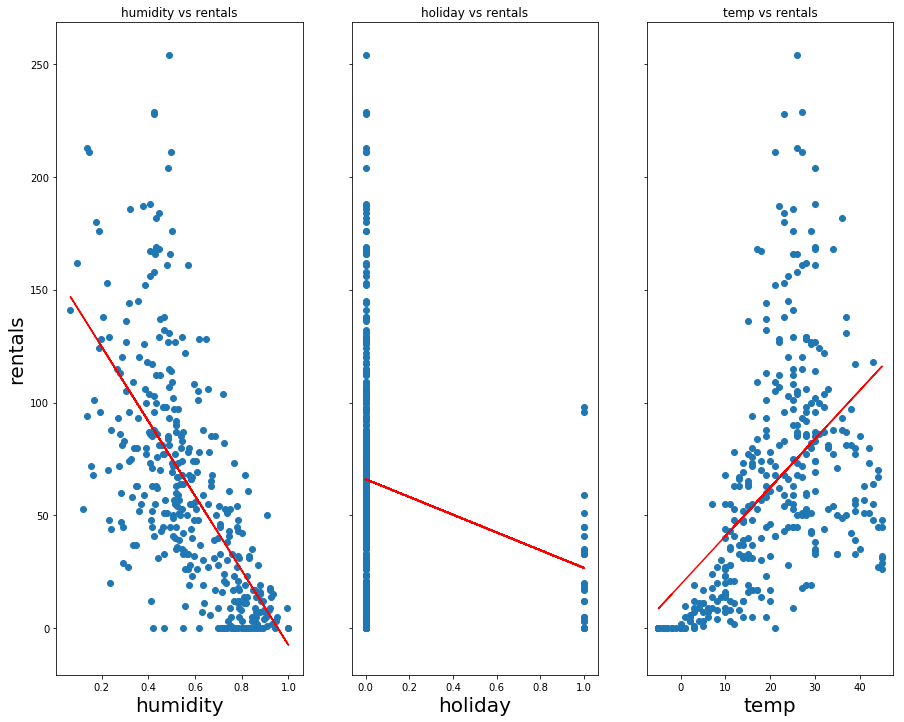

In [16]:
# Your code below:
rentals = pd.read_csv('bike_rentals.csv')
rentals.head()  # Clearly, out Y here is price and X's are sq_feet and quality

# rentals, day_of_week, season, holiday, temp, humidity

rentals_q = rentals[['rentals','day_of_week','season','humidity','holiday', 'temp']]
rentals_q = rentals_q.dropna(how='any')

X_humidity = np.array(rentals_q['humidity']).reshape(364, 1)
X_holiday = np.array(rentals_q['holiday']).reshape(364, 1)
X_temp = np.array(rentals_q['temp']).reshape(364, 1)
Y = np.array(rentals_q['rentals']).reshape(364, 1)

lm = LinearRegression()
lin = lm.fit(X_humidity, Y)
preds = lin.predict(X_humidity)
#print("Intercept ", lin.intercept_)
#print("Ccoefficient ", lin.coef_)
#print("MSE on data: ", np.mean((Y-lin.predict(X))**2))
#print("R^2 on data: ", r2_score(Y,lin.predict(X)))

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 12), sharey=True)
#plt.figure(figsize=(16,12))
axes[0].set_title("humidity vs rentals")
axes[0].scatter(X_humidity,Y)
axes[0].plot(X_humidity,preds,color='r')
axes[0].set_xlabel('humidity',fontsize=20)
axes[0].set_ylabel('rentals',fontsize=20)


#lm = LinearRegression()
lin = lm.fit(X_holiday, Y)
preds = lin.predict(X_holiday)
axes[1].set_title("holiday vs rentals")
axes[1].scatter(X_holiday,Y)
axes[1].plot(X_holiday,preds,color='r')
axes[1].set_xlabel('holiday',fontsize=20)
#axes[1].set_ylabel('rentals',fontsize=20)

lin = lm.fit(X_temp, Y)
preds = lin.predict(X_temp)
axes[2].set_title("temp vs rentals")
axes[2].scatter(X_temp,Y)
axes[2].plot(X_temp,preds,color='r')
axes[2].set_xlabel('temp',fontsize=20)
#axes[2].set_ylabel('rentals',fontsize=20)

plt.show()

### 2.3 Multivariate Regressions

Frankly, one variable is never really going to be a good predictor in real life. Problems are far more complex and have numerous layers to them. One way to include more than one variable into your regression analysis is the unimaginatively named Multivariate Regression. 

Think back to our regression equation. We can have as many variables as we like in our Multivariate equation right? 

We just need to be careful of one thing: multicollinearity. This is when your predictor variables themselves are highly correlated. This can artifically push our R^2 up, and lower our MSE, but also, multicollinearity errors can hide significant coefficients. There are many ways to avoid it, but the best will always be dimensionality reduction.

Let's try multivariate regressions first on a trivial case, the housing dataset.

In [17]:
X = house.drop('price',axis=1)
Y = house[['price']]

In [18]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size = 0.25, random_state = 5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(599, 2)
(599, 1)
(200, 2)
(200, 1)


In [19]:
lm2 = LinearRegression()

linmod = lm2.fit(X_train,Y_train)
print("Our intercept ", linmod.intercept_)
print("Our coefficient ", linmod.coef_)
print("MSE on train data: ", np.mean((Y-linmod.predict(X))**2))
print("R^2 on train data: ", r2_score(Y_train,linmod.predict(X_train)))

Our intercept  [-57934.97215963]
Our coefficient  [[   50.59370981  1234.76766128]]
MSE on train data:  price    2.494853e+08
dtype: float64
R^2 on train data:  0.873775773931


In [20]:
linmod3 = lm2.fit(X_test,Y_test)
print("Our intercept ", linmod3.intercept_)
print("Our coefficient ", linmod3.coef_)
print("MSE on train data: ", np.mean((Y-linmod3.predict(X))**2))
print("R^2 on train data: ", r2_score(Y_test,linmod3.predict(X_test)))

Our intercept  [-50861.29438801]
Our coefficient  [[   50.22224495  1125.87145686]]
MSE on train data:  price    2.552224e+08
dtype: float64
R^2 on train data:  0.882402235979


Notice our R^2 has improved drastically, but our MSE has increased also. 

How would we solve this problem?

# In-Class Activity 3:

Using the bike rental dataset, can you try use all you've learnt to make a good predictive model for number of rentals? Feel free to use linear or multivariate regressions.


In [21]:
# Your code below:
rentals.head()

def convertDayOfWeek(dow):
    if (dow == 'Monday' or dow == 'Tuesday' or dow == 'Wednesday' or dow == "Thursday"):
        return 0
    else:
        return 1

rentals['weekend'] = rentals['day_of_week']
rentals['weekend'] = rentals['weekend'].apply(convertDayOfWeek)

#print(rentals.head())

rentals_q1 = rentals[['rentals','weekend','humidity','holiday', 'temp']]
rentals_q1 = rentals_q1.dropna(how='any')

X = rentals_q1.drop('rentals', axis=1)
Y = rentals_q1[['rentals']]

print(X)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size = 0.25, random_state = 5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)







     weekend  humidity  holiday  temp
0          0     0.500        0    21
1          0     0.414        1    25
2          0     0.352        0    15
3          0     0.305        0    26
4          1     0.236        1    10
5          1     0.279        0    19
6          1     0.321        0    25
7          0     0.231        0    25
8          0     0.192        0    23
9          0     0.264        0    27
10         0     0.289        0    22
11         1     0.223        0    23
12         1     0.319        0    19
13         1     0.305        0    15
14         0     0.280        0    28
15         0     0.359        0    27
16         0     0.439        0    16
17         0     0.415        0    13
18         1     0.481        0    30
19         1     0.494        0    26
20         1     0.482        0    22
21         0     0.530        0    18
22         0     0.589        0    10
23         0     0.527        0    23
24         0     0.622        0    16
25         1

In [22]:


lm = LinearRegression()
lin = lm.fit(X_train, Y_train)
preds = lin.predict(X_train)
#print("Intercept ", lin.intercept_)
#print("Ccoefficient ", lin.coef_)
print("MSE on train data: ", np.mean((Y_train -preds)**2))
print("R^2 on train data: ", r2_score(Y_train ,preds))

preds = lin.predict(X_test)
#print("Intercept ", lin.intercept_)
#print("Ccoefficient ", lin.coef_)
print("MSE on test data: ", np.mean((Y_test -preds)**2))
print("R^2 on test data: ", r2_score(Y_test ,preds))



MSE on train data:  rentals    1023.491894
dtype: float64
R^2 on train data:  0.595896746224
MSE on test data:  rentals    902.663852
dtype: float64
R^2 on test data:  0.702359912202


### 2.4 Logisic Regressions

Logsitic regression is a classification algorithm to predict binary outcomes from continuous or categorical data. Unlike linear regressions, logistic regressions only classify your input variables into binaries (yes/no, 1/0), and this makes them quite powerful in numerous real world cases. 

**Use Cases & Data Types:** Your dependent variable must be binary (1/0), and your independent variables can be continuous, categorical or ordinal. There are many different real life problems that logistic regressions can provide predictions for such as transcation classifications & fraud detection.

**Pros:** 
- Very useful for real life classification problems
- Data type insensitive: continuous or categorical predictors
- Good for tagging mechanisms 

**Cons:**
- Can be computationally expensive
- Easy to overfit (validation is super important)
- Can be hard to interpret sometimes

In [23]:
# First, i'm going to say that my budget for buying a house is $60,000

def expensive(x):
    if x> 60000:
        return 1
    else:
        return 0
    
house['overBudget?'] = house['price'].apply(expensive)
house.head()

,price,sq_feet,quality,overBudget?
0,30992.64,718,38,0
1,21187.60,601,30,0
2,47161.68,896,41,0
3,15338.82,421,19,0
4,29759.07,551,49,0


In [24]:
# Dropping price because we don't need it

house_dich = house.drop('price',axis=1)
house_dich.head()

,sq_feet,quality,overBudget?
0,718,38,0
1,601,30,0
2,896,41,0
3,421,19,0
4,551,49,0


In [25]:
X = house[['sq_feet','quality']]  # Seperating out X's and Y's
Y = house[['overBudget?']]

In [26]:
# Let's see how accurately we can predict whether a house is over budget using sq_feet and quality

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

model = LogisticRegression()
model = model.fit(X,Y)
model.score(X,Y)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.92615769712140172

In [27]:
# First, let's see how many houses are actually over budget for me:

print(Y.mean())

overBudget?    0.441802
dtype: float64


This is looking decent! Roughly half the houses are over budget for me, but using quality and sq_feet, we've managed to predict 93% of houses correctly.

### All looks go so far, but take it with a grain of salt until we perform validation

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(535, 2)
(264, 2)
(535, 1)
(264, 1)


In [29]:
model = model.fit(X_train,Y_train)
train_preds = model.predict(X_train)
model.score(X_train,Y_train)


C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.92149532710280369

A little lower training score than before, but let's see how our test score is

In [30]:
test_pred = model.predict(X_test)
print(model.score(X_test,Y_test))

0.924242424242


In [31]:
print(test_pred)

[1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1
 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 1 1 0 1]


In [32]:
probs = model.predict_proba(X_test)
print(probs)

[[ 0.36924944  0.63075056]
 [ 0.55399126  0.44600874]
 [ 0.02896551  0.97103449]
 [ 0.95639288  0.04360712]
 [ 0.87854818  0.12145182]
 [ 0.02001796  0.97998204]
 [ 0.94743232  0.05256768]
 [ 0.04498233  0.95501767]
 [ 0.9175207   0.0824793 ]
 [ 0.4938871   0.5061129 ]
 [ 0.00379136  0.99620864]
 [ 0.25870213  0.74129787]
 [ 0.27116149  0.72883851]
 [ 0.78717155  0.21282845]
 [ 0.25370343  0.74629657]
 [ 0.92982086  0.07017914]
 [ 0.99826923  0.00173077]
 [ 0.99193783  0.00806217]
 [ 0.97520791  0.02479209]
 [ 0.01152575  0.98847425]
 [ 0.00980578  0.99019422]
 [ 0.24165623  0.75834377]
 [ 0.50718657  0.49281343]
 [ 0.01856334  0.98143666]
 [ 0.31967826  0.68032174]
 [ 0.87509704  0.12490296]
 [ 0.15685586  0.84314414]
 [ 0.31083436  0.68916564]
 [ 0.86776622  0.13223378]
 [ 0.87091837  0.12908163]
 [ 0.16065441  0.83934559]
 [ 0.23248841  0.76751159]
 [ 0.20014301  0.79985699]
 [ 0.7144951   0.2855049 ]
 [ 0.7879219   0.2120781 ]
 [ 0.86745103  0.13254897]
 [ 0.12729609  0.87270391]
 

### As you can see, everytime the probability of 1 is > 50%, the model is predicting a 1. 

In [33]:
# Confusion Matrix to see false positives and negatives

print(metrics.confusion_matrix(Y_test, test_pred))

[[140  11]
 [  9 104]]


### 135 under budget houses were predicted correctly, 7 were predicted to be over budget when they were actually under budget, 11 were thought to be under budget when they were actually over budget, and 111 over budget houses were predicted correctly.

## Final Scores:

In [34]:
print("Train accuracy score: ", sklearn.metrics.accuracy_score(Y_train, train_preds))
print("Test accuracy score: ", sklearn.metrics.accuracy_score(Y_test, test_pred))

Train accuracy score:  0.921495327103
Test accuracy score:  0.924242424242


In [35]:
# This still doesn't mean much. What if there are very few occurences at all of the positive?
# Say 99% of the houses here are under my budget. Then just by randomly guessing 0 every time, you'll have an accuracy
# score of 99%
# Classification Report solves that issue, by giving us some important metrics

print(metrics.classification_report(Y_test, test_pred))

             precision    recall  f1-score   support

          0       0.94      0.93      0.93       151
          1       0.90      0.92      0.91       113

avg / total       0.92      0.92      0.92       264



**Precision** is how good the model is not labelling positives as negatives. tp/(tp+fp) (agressive approach) <br>
**Recall** is the ability of the model to find all the positives. tp/(tp+fn) (conservative approach) <br>
**F1-score** is the weighted mean of precision and recall. 1 is the best value and 0 is the worst. <br>

For fun, let's predict if a 1500 sq ft house with a 60 quality rating will be in imy budget. 

In [36]:
model.predict_proba(np.array([1500,60]))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.18042004,  0.81957996]])

### There's an ~81% chance that a 1500 sq ft house with a 60 quality score is over my budget.

## Dummy Variables and Logistic Regressions

We can also use categorical variables as predictors in logistic regressions, we just have to turn them into dummy features.

In [37]:
bike = pd.read_csv('bike_rentals.csv')
bike.head()

,rentals,day_of_week,season,holiday,temp,humidity
0,109,Monday,Spring,0,21,0.500
1,45,Tuesday,Spring,1,25,0.414
2,63,Wednesday,Spring,0,15,0.352
3,105,Thursday,Spring,0,26,0.305
4,20,Friday,Spring,1,10,0.236


In [38]:
# We will be predicting if there will be over 100 bicycle's rented out on any particular day, using only some features

def over100(x):
    if x>100:
        return 1
    else:
        return 0
bike['over100'] = bike['rentals'].apply(over100)
bike.head()

,rentals,day_of_week,season,holiday,temp,humidity,over100
0,109,Monday,Spring,0,21,0.500,1
1,45,Tuesday,Spring,1,25,0.414,0
2,63,Wednesday,Spring,0,15,0.352,0
3,105,Thursday,Spring,0,26,0.305,1
4,20,Friday,Spring,1,10,0.236,0


In [39]:
# Just dropping price in a vry long winded way

bikes = bike[['season','day_of_week','holiday','temp','humidity','over100']]  
bikes.head()

,season,day_of_week,holiday,temp,humidity,over100
0,Spring,Monday,0,21,0.500,1
1,Spring,Tuesday,1,25,0.414,0
2,Spring,Wednesday,0,15,0.352,0
3,Spring,Thursday,0,26,0.305,1
4,Spring,Friday,1,10,0.236,0


In [40]:
# Getting dummies for all cat variables (season & day_of_week)

df_dummies = pd.get_dummies(bikes,prefix = 'dum')
logit_data = df_dummies.drop(['dum_Fall','dum_Monday'],axis=1) # Anyone know why we do this?
logit_data.head()

,holiday,temp,humidity,over100,dum_Spring,dum_Summer,dum_Winter,dum_Friday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday
0,0,21,0.500,1,1,0,0,0,0,0,0,0,0
1,1,25,0.414,0,1,0,0,0,0,0,0,1,0
2,0,15,0.352,0,1,0,0,0,0,0,0,0,1
3,0,26,0.305,1,1,0,0,0,0,0,1,0,0
4,1,10,0.236,0,1,0,0,1,0,0,0,0,0


In [41]:
# Taking out our X's and Y's 

X = logit_data.drop('over100',axis=1)
Y = logit_data[['over100']]

In [42]:
logit = LogisticRegression()
mod1 = logit.fit(X,Y)
mod1.score(X,Y)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.87637362637362637

In [43]:
Y.mean()

over100    0.203297
dtype: float64

### That's an impressive jump in accuracy! Only 20% of the days had over 100 bike rentals, but we were able to predict them with ~88% accuracy. Again, remember the validation, and don't forget the salt

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(243, 12)
(121, 12)
(243, 1)
(121, 1)


In [45]:
mod2 = logit.fit(X_train,Y_train)
train_preds = mod2.predict(X_train)
mod2.score(X_train,Y_train)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.89711934156378603

Accuracy score not too different

In [46]:
mod3 = logit.fit(X_test,Y_test)
test_preds = mod3.predict(X_test)
mod3.score(X_test,Y_test)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85123966942148765

In [47]:
print("Train score: ",mod2.score(X_train,Y_train))
print("Test score: ",mod3.score(X_test,Y_test))

Train score:  0.818930041152
Test score:  0.851239669421


### Increased accuracy score in test set, but still quite similar to train, so it looks good! 

### 85% of the time, it works every time!

In [48]:
print(metrics.confusion_matrix(Y_test, test_preds))

[[94  2]
 [16  9]]


However, the confusion matrix tells a different story. 11/16 (~70%) are false positives



In [49]:
print(metrics.classification_report(Y_test, test_preds))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91        96
          1       0.82      0.36      0.50        25

avg / total       0.85      0.85      0.83       121



# In-Class (& Out-of-Class) Activity 4:

Remember the Human Resource dataset? Use logistic regressions to find the best model you can to predict if an employee will leave the company or not. 

Make sure to validate it! 


In [50]:
# Your code below:
hr_df = pd.read_csv('hr_data.csv')
hr_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [51]:
hr_df_dummy = pd.get_dummies(hr_df, prefix='dummy')
hr_df_dummy.head()
list(hr_df_dummy)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'dummy_IT',
 'dummy_RandD',
 'dummy_accounting',
 'dummy_hr',
 'dummy_management',
 'dummy_marketing',
 'dummy_product_mng',
 'dummy_sales',
 'dummy_support',
 'dummy_technical',
 'dummy_high',
 'dummy_low',
 'dummy_medium']

In [52]:
'''
import seaborn as sns

correlations_map= hr_df_dummy.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlations_map, annot=True, cbar=True, cmap="coolwarm_r")
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()
'''

'\nimport seaborn as sns\n\ncorrelations_map= hr_df_dummy.corr()\nplt.figure(figsize=(15, 15))\nsns.heatmap(correlations_map, annot=True, cbar=True, cmap="coolwarm_r")\nplt.xticks(rotation=90, fontsize=15)\nplt.yticks(rotation=0, fontsize=15)\nplt.show()\n'

In [60]:
#factors: all except left
#prediction: left (0 or 1)
#'dummy_IT', 'dummy_RandD', 'dummy_accounting', 'dummy_hr', 'dummy_management', 'dummy_marketing', 'dummy_product_mng', 'dummy_support', 'dummy_technical', 

X = hr_df_dummy.drop(['left', 'last_evaluation', 'dummy_high'], axis=1)
Y = hr_df_dummy[['left']]


In [61]:
hr_model = LogisticRegression()
hr_model.fit(X, Y)
hr_model.score(X, Y)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7959197279818655

In [62]:
Y.mean()

left    0.238083
dtype: float64

In [69]:
#Validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14849, 18)
(150, 18)
(14849, 1)
(150, 1)


In [70]:
hr_model.fit(X_train, Y_train)
train_predicts = hr_model.predict(X_train)
hr_model.score(X_train, Y_train)

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79567647653040607

In [72]:
test_predicts = hr_model.predict(X_test)
hr_model.score(X_test, Y_test)

0.80000000000000004

In [73]:
Y_test.mean()

left    0.233333
dtype: float64

In [74]:
print(test_predicts)

[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0]


In [75]:
test_predicts_proba = hr_model.predict_proba(X_test)
print(test_predicts_proba)

[[ 0.73629722  0.26370278]
 [ 0.52122751  0.47877249]
 [ 0.93867492  0.06132508]
 [ 0.51496893  0.48503107]
 [ 0.9700026   0.0299974 ]
 [ 0.97056921  0.02943079]
 [ 0.76932198  0.23067802]
 [ 0.93521902  0.06478098]
 [ 0.21846191  0.78153809]
 [ 0.47765231  0.52234769]
 [ 0.93894207  0.06105793]
 [ 0.89356317  0.10643683]
 [ 0.79721604  0.20278396]
 [ 0.79973521  0.20026479]
 [ 0.97387228  0.02612772]
 [ 0.94205129  0.05794871]
 [ 0.9469288   0.0530712 ]
 [ 0.49177969  0.50822031]
 [ 0.86322479  0.13677521]
 [ 0.78625813  0.21374187]
 [ 0.68306405  0.31693595]
 [ 0.65564624  0.34435376]
 [ 0.93088964  0.06911036]
 [ 0.82064239  0.17935761]
 [ 0.23096365  0.76903635]
 [ 0.82809856  0.17190144]
 [ 0.81680232  0.18319768]
 [ 0.99151774  0.00848226]
 [ 0.27129285  0.72870715]
 [ 0.95342469  0.04657531]
 [ 0.94493575  0.05506425]
 [ 0.54363434  0.45636566]
 [ 0.9494533   0.0505467 ]
 [ 0.79843975  0.20156025]
 [ 0.7268436   0.2731564 ]
 [ 0.91220179  0.08779821]
 [ 0.8211989   0.1788011 ]
 

In [76]:
print(metrics.classification_report(Y_test, test_predicts))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88       115
          1       0.62      0.37      0.46        35

avg / total       0.78      0.80      0.78       150



In [77]:
print(metrics.confusion_matrix(Y_test, test_predicts))

[[107   8]
 [ 22  13]]
